In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist

# Preprocessing 

In [32]:
  # data start downloading from amazon instance
(train_feature , train_label) , (test_feature , test_label ) = mnist.load_data()
train_feature.shape

(60000, 28, 28)

60,000 images with 28 ** 28 pixel or features total values 

Now we align 28  ** 28  into a single row  

Each row represent an Image

In [5]:
train_feature[0].shape

(28, 28)

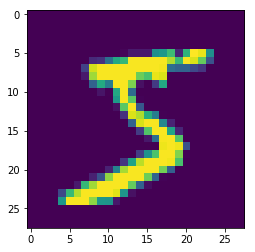

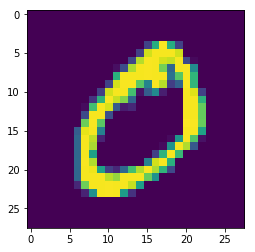

In [6]:
plt.imshow(train_feature[0])
plt.show()
plt.imshow(train_feature[1])
plt.show()


### check labels of these images

In [7]:
train_label[[0,1]]

array([5, 0], dtype=uint8)

### Lets check the values of images

In [8]:
pd.DataFrame(train_feature[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_feature.max()

255

## Normalizing

In [33]:
train_feature = train_feature/train_feature.max()
test_feature = test_feature/test_feature.max()

In [34]:
print(train_feature.shape)
z = train_feature.shape[1] * train_feature.shape[2]
train_feature = train_feature.reshape(train_feature.shape[0],z)
test_feature = test_feature.reshape(test_feature.shape[0],z) # image size is same in both data sets
pd.DataFrame(train_feature)

(60000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Specification

In [13]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape =(train_feature.shape[1], ) ))
model.add(Dense(10,activation='softmax'))

## since our target values are in decimal we need to convert them into one-hot encoded form 

In [14]:
from keras.utils import to_categorical

In [15]:
train_label = to_categorical(train_label)
#test_label = to_categorical(test_label)

## Compiling the model

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(train_feature,train_label,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 27s 446us/step - loss: 0.2013 - acc: 0.9406
Epoch 2/5
60000/60000 [==============================] - 26s 433us/step - loss: 0.0805 - acc: 0.9756
Epoch 3/5
60000/60000 [==============================] - 26s 427us/step - loss: 0.0528 - acc: 0.9836
Epoch 4/5
60000/60000 [==============================] - 25s 415us/step - loss: 0.0372 - acc: 0.98830s - loss: 0.037
Epoch 5/5
60000/60000 [==============================] - 25s 414us/step - loss: 0.0280 - acc: 0.9911


In [18]:
model.predict_classes(test_feature)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
q = model.evaluate(test_feature,to_categorical(test_label))
print(q)
print('Accuracy : ',q[1]*100,'%')

10000/10000 [==============================] - 1s 80us/step
[0.06645988127904712, 0.9804]
Accuracy :  98.04 %


In [42]:
# Another way to check accuracy
pred = model.predict_classes(test_feature)

In [43]:
c = 0
for i,j in enumerate(test_label):
    if j==pred[i]:
        c+=1
print("Testing Data Accuracy : ",c/100,'%')

Testing Data Accuracy :  98.04 %


In [41]:
pred = model.predict_classes(train_feature)
c = 0
for i,j in enumerate(train_label):
    if j==pred[i]:
        c+=1
print("Training Data Accuracy : ",c/600,'%')

Training Data Accuracy :  99.335 %
